# opencv course
# A presentation by Mohammad Kahkeshani
### instagram:
#### codevision_academy
#### kahkeshani_mohammad

### Make a brush

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

###  اگر یک متغیر در اسکوپ گلوبال (خارج از بدنۀ تمامی فانکشن‌های برنامه) تعریف و استفاده شود، متغیری گلوبال است


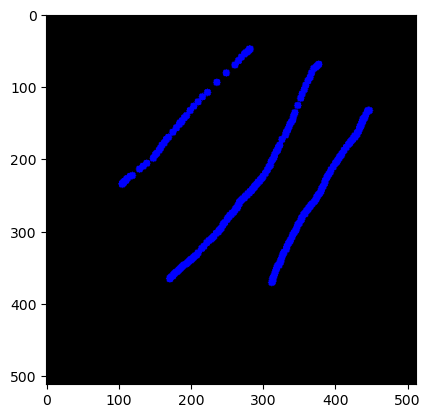

In [2]:
# Creating a global variable
draw = False # True if mouse is pressed

# callback function
def brush(event, x, y, falgs, params): # you have to memorize this
    global draw
    if event == cv2.EVENT_LBUTTONDOWN:
        draw = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if draw == True:
            cv2.circle(img,(x,y),5,(255,0,0), -1)
    elif event == cv2.EVENT_LBUTTONUP:
        draw = False

img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', brush)

while True:
    cv2.imshow('image', img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

### Change the pen color

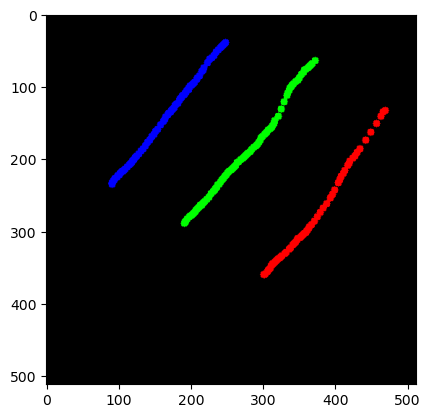

In [3]:
import matplotlib.pyplot as plt

import numpy as np
import cv2 

drawing = False # true if mouse is pressed
color = (255,0,0)
# mouse callback function
def brush(event,x,y,flags,param):
    global drawing, color
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(img,(x,y),5,color,-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
            
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',brush)

while True:
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('b'):
        color = (255,0,0)
    elif k==ord('g'):
        color = (0,255,0)
    elif k==ord('r'):
        color = (0,0,255)
    elif k == 27:
        break
cv2.destroyAllWindows()

plt.imshow(img[...,::-1])

### correction the pen

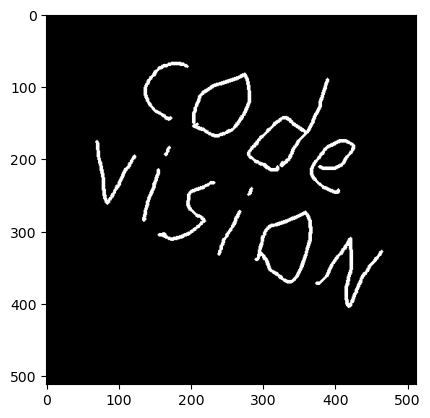

In [5]:
img = np.zeros((512,512,3), np.uint8)
drawing = False
ix = 0
iy = 0
# Adding Function Attached To Mouse Callback
def draw(event,x,y,flags,params):
    global ix,iy,drawing
    # Left Mouse Button Down Pressed
    if event==cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix = x
        iy = y
    if event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            #For Drawing Line
            cv2.line(img,pt1=(ix,iy),pt2=(x,y),color=(255,255,255),thickness=3)
            ix = x
            iy = y
    if event==cv2.EVENT_LBUTTONUP:
        drawing = False



# Making Window For The Image
cv2.namedWindow("Window")

# Adding Mouse CallBack Event
cv2.setMouseCallback("Window",draw)

# Starting The Loop So Image Can Be Shown
while True:

    cv2.imshow("Window",img)

    if cv2.waitKey(1) & 0xFF ==27:
        break

cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

### create a rectangle

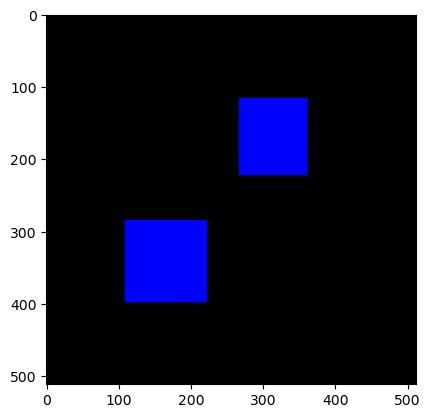

In [14]:
draw = False
start_point = (0,0)

def draw(event,x,y,flag,params):
    global draw, start_point
    if event == cv2.EVENT_LBUTTONDOWN:
        draw = True
        start_point = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if draw == True:
            cv2.rectangle(img, start_point, (x,y),(255,0,0), -1)
    elif event == cv2.EVENT_LBUTTONUP:
        draw = False
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw)

while True:
    cv2.imshow('image', img)
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])
    

### annotate objects with rectangle

[[(496, 166), (269, 796)], [(1095, 373), (973, 726)], [(783, 435), (703, 710)], [(665, 443), (567, 703)], [(1337, 329), (1211, 725)]]


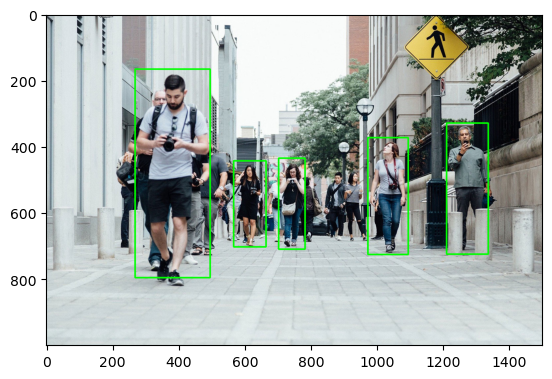

In [4]:
# import the necessary packages
import cv2

# now let's initialize the list of reference point
start_point = (0,0)
points = []
drawing= False

def annotate_image(event, x, y, flags, param):
    # grab references to the global variables
    global start_point, points, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        start_point = (x, y)
        drawing = True 
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            temp_image = image.copy()
            cv2.rectangle(temp_image, start_point, (x, y), (120,255,0), 2)
            cv2.imshow("image", temp_image)
    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        points.append([start_point , (x, y)])

        # draw a rectangle around the region of interest
        cv2.rectangle(image, start_point, (x, y), (0, 255, 0), 3)
        cv2.imshow("image", image)
        drawing = False

        
# load the image, clone it, and setup the mouse callback function
image = cv2.imread('images/walking.jpg')
clone = image.copy()
temp_image = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", annotate_image)

while True:
    # display the image and wait for a keypress
    if drawing == False:
        cv2.imshow("image", image)
    key = cv2.waitKey(5) & 0xFF

    # press 'r' to reset the window
    if key == ord("r"):
        image = clone.copy()
        points = []

    # if the 'c' key is pressed, break from the loop
    elif key == 27:
        break

# close all open windows
cv2.destroyAllWindows() 

plt.imshow(image[...,::-1])
print(points)